# VLNS Executables:

   ### Output interpretation
   
#### label_description = 
       ["cost","time","empty","dist","rest","shift","break","sleep","wait","backshift","forwardshift"]
#### possible values:
       (-1:inf, 0:8640, 0,1,  0:inf,  0:540, 0:780,  0:270,   0,1,  0:8640,   0:8640,     0:8640    )
       (A shift back in time = earlier, forward shift = later, one rest = 660min)
       
    A tour is a squence of locations one driver visits,
    A 'job' (a,b,c) assigned to a driver means a drive from a to b, 
    c being the request number. 
    c = 'None' if it is a drive in between requests.
    
#### How a tour looks when we only show the requests
    [(2, 3, 1), (8, 9, 4)]
    
#### How the same tour looks with all labels: (20 = depot location)
    [ (20, 20, 10),        [0, 0, 0, 0, 0, 0, 0, 1, 0, 8640, 8640], 
      (20, 2, None), array([ 0, 3390, 0, 0, 0, 90, 0, 1, 0, 0, 3345]), 
      (2, 3, 1),     array([ 604, 4035, 1, 0, 495, 720, 0, 0, 0, 0, 0]),
      (3, 8, None),  array([1445, 5012, 0, 0, 182, 272, 0, 1, 0, 0, 73]), 
      (8, 9, 4),     array([1689, 5325, 1, 0, 392, 572, 0, 0, 0, 0, 0])  ]
    
#### How a routing looks like (all tours shown):
    [(0, 1, 0)]
    [(6, 7, 3)]  
    [(2, 3, 1), (8, 9, 4)]
    [(12, 13, 6)]
    [(14, 15, 7)]
    [(16, 17, 8), (10, 11, 5)]
    [(18, 19, 9), (4, 5, 2)]


In [1]:
'''
    Importing all needed functions:
'''
import import_ipynb
from Helping_functions import * ## Helping_functions.ipynb has to be in the same folder as this Notebook
                                ## The Data Sheet and the polygon 'intersection.shp' as well

importing Jupyter notebook from Helping_functions.ipynb


### Executables:
#### data_read(Sheetname, visualization = 0, printing = 1):
Reads the specified datasheet from the file 'Test.xlxs' 
The other two parameters can be set 1 for route visualization and printing the requests.

 
 Requests only: 
[(0, 1, 0)]
[(2, 3, 1)]
[(4, 5, 2)]
[(6, 7, 3)]
[(8, 9, 4)]
[(10, 11, 5)]
[(12, 13, 6)]
[(14, 15, 7)]
[(16, 17, 8)]
[(18, 19, 9)]


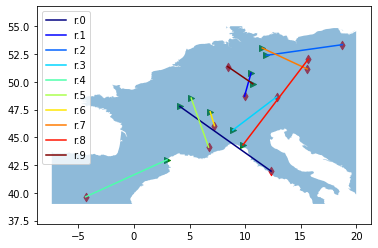

initial solutions costs: 26895


In [2]:
(n, requests, lats, lons, pick_start, pick_end, delivery_start, delivery_end, coordinates,
           time_windows, initial_routes, valid_requests) = data_read('Data_N_10',1,1,r'Test.xlsx')
old_costs = 0
fixcosts = 2000
for s in initial_routes:
    old_costs += s[-1][0] + fixcosts
print('initial solutions costs:', old_costs)

#### VLNS_IG(initial_sol, cost_output = 0, move_mode = 0, fixcosts = 2000, max_iter = 100000000):
Executes an Large Neighborhood Search (implicit) with improvement graph for neighborhood navigation
Different Operators can be chosen with the mode argument.

In [3]:
solution, path, cost_change, cost_comparison, improvement, break_crit,\
        new_costs = VLNS_IG(initial_routes)

print_requ(solution)
print('break crit.:', break_crit)
print('improvement:', old_costs - new_costs)

 
 Requests only: 
[(0, 1, 0)]
[(4, 5, 2)]
[(2, 3, 1), (6, 7, 3)]
[(8, 9, 4)]
[(10, 11, 5), (12, 13, 6)]
[(14, 15, 7)]
[(16, 17, 8)]
[(18, 19, 9)]
break crit.: local min
improvement: 1203


#### simple_greedy ( routes, fixcosts=2000, seconds = 300, max_fct_calls = 5000 ):
Solution approach to compare to LNS solution
Delete one request,that reduces the cost function the most, when inserted at the best possible place.
Relocates at most max_fct_calls requests and stops after at most 'seconds' seconds.

In [4]:
(sol, function_calls, total_iter_count, total_savings, cost_diff, 
         changes, infeas_after_delete) = simple_greedy(initial_routes)
print_requ(sol)
print(total_savings)

 
 Requests only: 
[(0, 1, 0)]
[(4, 5, 2)]
[(2, 3, 1), (6, 7, 3)]
[(8, 9, 4)]
[(10, 11, 5), (12, 13, 6)]
[(14, 15, 7)]
[(16, 17, 8)]
[(18, 19, 9)]
1203


#### Brute Force Approach: 
(only for n<=20)

In [3]:
combi_bool = tuple_table(initial_routes)
zweier, dreier, vierer, funfer, sechser, siebener = combs(n, combi_bool, requests)
(valid_zweier, valid_dreier, valid_vierer, valid_funfer,combinations_zz,combinations_zzz,
       combinations_4z,combinations_5z,combinations_6z,combinations_7z,combinations_8z,
       combinations_dd,combinations_ddd,combinations_dddd,combinations_5d,
       combinations_6d,combinations_vv,combinations_vvv,combinations_vvvv,
       zweier_cost,dreier_cost,vierer_cost,funfer_cost
    ) = valid_combs(initial_routes,zweier, dreier, vierer, funfer, requests, fixcosts = 2000)

(best_val, best_combi) = best_combination(n,2000,valid_zweier, valid_dreier, valid_vierer, valid_funfer,\
                                          zweier_cost,dreier_cost,vierer_cost,funfer_cost)
print('improvment:', old_costs - best_val)
for b in best_combi:
    if len(b)>0:
        print(b)    

improvment: 7515
[7, 5, 6, 2]
[1, 3]
